<a href="https://www.kaggle.com/code/beelaboo/forest-fires-in-brazil?scriptVersionId=91594142" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

* Questions:
* 1. Display Top 5 Rows of The Dataset
* 2. Check Last 5 Rows
* 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)
* 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
* 5. Check For Duplicate Data and Drop Them
* 6. Check Null Values In The Dataset
* 7. Get Overall Statistics About The Dataframe
* 8. Rename Month Names To English
* 9. Total Number of Fires Registered
* 10. In Which Month Maximum Number of Forest Fires Were Reported?
* 11. In Which Year Maximum Number of Forest Fires Was Reported?
* 12. In Which State Maximum Number of Forest Fires Was Reported?
* 13. Find Total Number of Fires Were Reported In Amazonas
* 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)
* 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)
* 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’
* 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)
* 18.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data= pd.read_csv('../input/forest-fires-in-brazil/amazon.csv')

../input/forest-fires-in-brazil/amazon.csv

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 1539: invalid continuation byte

In [2]:
data= pd.read_csv('../input/forest-fires-in-brazil/amazon.csv',encoding='iso-8859-1')

In [3]:
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


* Display Top 5 Rows of The Dataset
* Check Last 5 Rows
* Find Shape of Our Dataset (Number of Rows And Number of Columns)
* Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [4]:
data.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [6]:
data.describe(include='all',datetime_is_numeric=True)

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,1998-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.000000,NaN
75%,2012.000000,NaN,NaN,113.000000,NaN


In [7]:
data.shape

(6454, 5)

* Check For Duplicate Data and Drop Them
*  Check Null Values In The Dataset

* data.duplicated(
        *     subset: 'Hashable | Sequence[Hashable] | None' = None,
        *     keep: "Literal['first'] | Literal['last'] | Literal[False]" = 'first',
                * ) -> 'Series'

In [8]:
dup_data = data.duplicated().any()

In [9]:
len(data[data.duplicated()])

32

In [10]:
dup_data

#means this dataset contains some duplicated data

True

In [11]:
data = data.drop_duplicates()

##assign back to original dataframe

In [12]:
data.shape

(6422, 5)

6454 - 6422 = 32 duplicated rows

Check Null Values In The Dataset

In [13]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

 Rename Month Names To English

# Map

* January   janeiro 
* February	fevereiro 
* March	março
* April	abril
* May	maio
* June	junho
* July	julho
* August	agosto
* September	setembro
* October	outubro
* November	novembro
* December	dezembro

In [14]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [15]:
data['new_month'] = data['month'].map({'Janeiro':'jan', 'Fevereiro':'feb',
                          'Março':'Mar', 'Abril':'Apr', 'Maio':'May', 'Junho':'Jun',         
                          'Julho':'Jul',  'Agosto':'Aug','Setembro':'Sep' ,
                         'Outubro':'Oct', 'Novembro':'Nov',           
                          'Dezembro':'Dec'           
                                    })

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Rename Month Names To English

In [16]:
data['new_month'].unique()

array(['jan', 'feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

Total Number of Fires Registered

In [17]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [18]:
data.shape

(6422, 6)

6422 fire reports

In Which Month of Forest Fires Were Reported?

In [19]:
data['new_month'].value_counts()

Aug    540
Sep    540
Oct    540
Nov    540
Jun    539
Jul    539
jan    535
feb    535
Mar    534
Apr    534
May    533
Dec    513
Name: new_month, dtype: int64

* Aug    540
* Sep    540
* Oct    540
* Nov    540

mean : Authum , Fall season

the highest number, show by month

<AxesSubplot:xlabel='new_month', ylabel='number'>

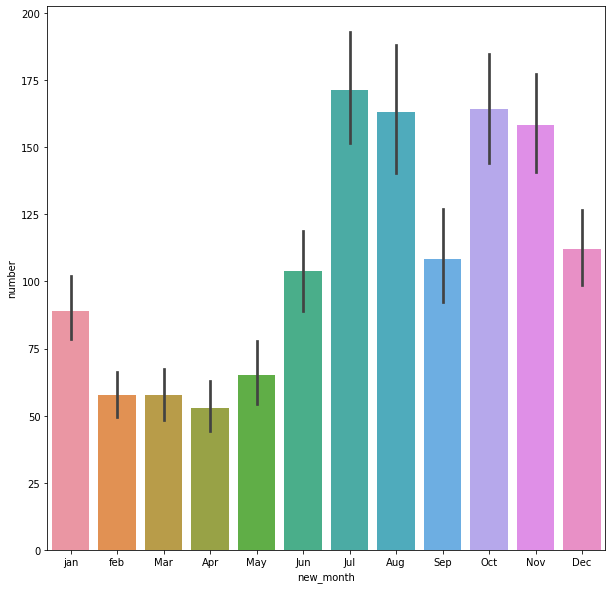

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(x='new_month',y='number',data=data)

In [21]:
data1= data.groupby('new_month')['number'].sum().reset_index()

In [22]:
data1

,new_month,number
0,Apr,28184.770
1,Aug,88050.435
2,Dec,57535.480
3,Jul,92319.113
4,Jun,55997.675
5,Mar,30709.405
6,May,34725.363
7,Nov,85508.054
8,Oct,88681.579
9,Sep,58578.305


<AxesSubplot:xlabel='new_month', ylabel='number'>

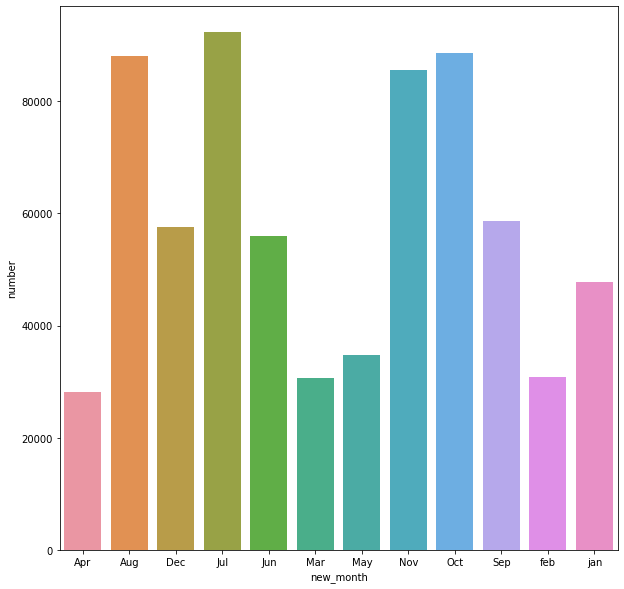

In [23]:
plt.figure(figsize=(10,10))
sns.barplot(x='new_month',y='number',data=data1)

which year max number of forest fire were reported?

In [24]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [25]:
data['date']

0       1998-01-01
1       1999-01-01
2       2000-01-01
3       2001-01-01
4       2002-01-01
           ...    
6449    2012-01-01
6450    2013-01-01
6451    2014-01-01
6452    2015-01-01
6453    2016-01-01
Name: date, Length: 6422, dtype: object

 data['date'].str.split('-')

In [26]:
data['year']

0       1998
1       1999
2       2000
3       2001
4       2002
        ... 
6449    2012
6450    2013
6451    2014
6452    2015
6453    2016
Name: year, Length: 6422, dtype: int64

In [27]:
data2= data.groupby('year')['number'].sum().reset_index()

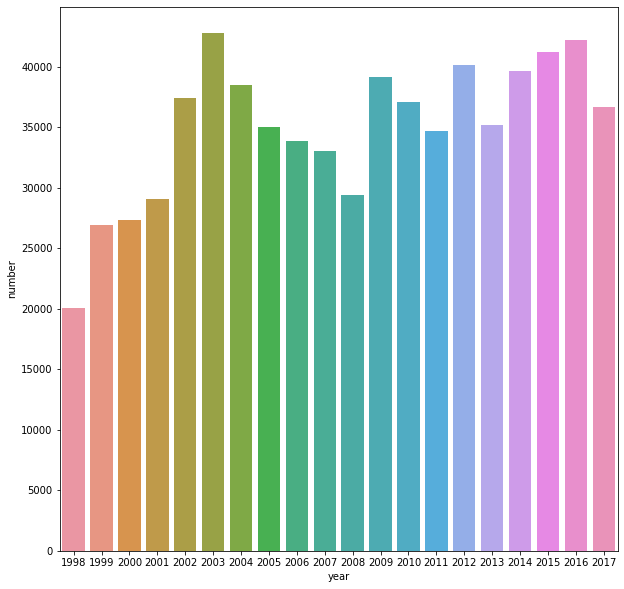

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(x='year',y='number',data=data2)
plt.show()

Which State Maximum Number of Forest Fires Was Reported?

In [29]:
data3= data.groupby('state')['number'].sum().reset_index()

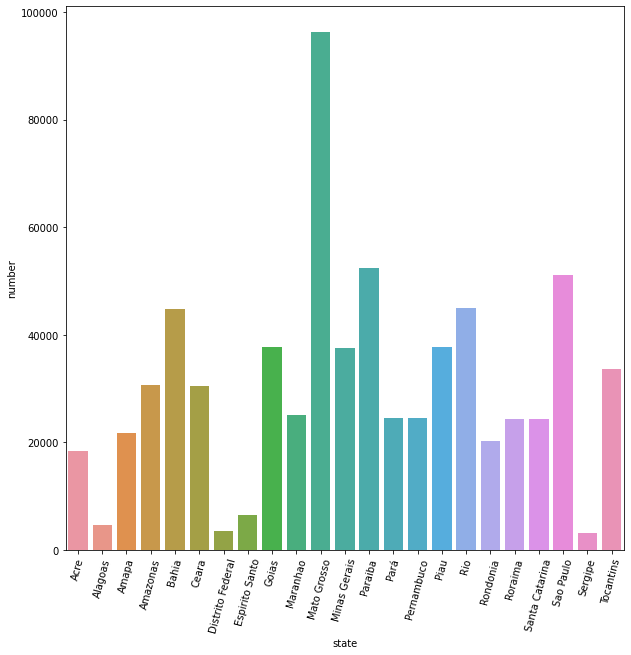

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(x='state',y='number',data=data3)
plt.xticks(rotation=75)
plt.show()

Total Number of Fires Were Reported In Amazonas

In [31]:
data[data['state'] == 'Amazonas']['number'].sum()

30650.129

* Display Number of Fires Were Reported In Amazonas (Year-Wise)
* Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [32]:
df1 = data[data['state'] == 'Amazonas']

In [33]:
df1

,year,state,month,number,date,new_month
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,Dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,Dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,Dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,Dec


In [34]:
df2 = df1.groupby('year')['number'].sum().reset_index()

In [35]:
df2

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<AxesSubplot:xlabel='year', ylabel='number'>

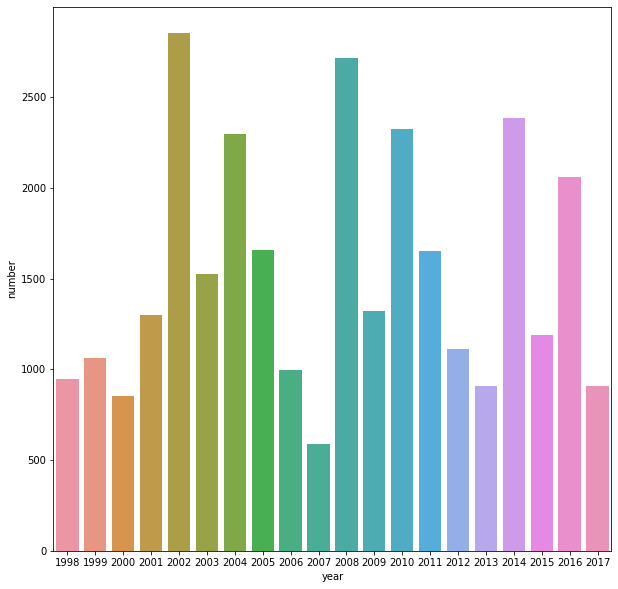

In [36]:
plt.figure(figsize=(10,10))
sns.barplot(x='year',y='number',data=df2)

Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [37]:
data['year'].dtype

dtype('int64')

In [38]:
data['number'].dtype

dtype('float64')

In [39]:
year_2015 = data[data['year']== 2015].groupby('new_month')['number'].sum().reset_index()

In [40]:
year_2015

,new_month,number
0,Apr,2573.000
1,Aug,4363.125
2,Dec,4088.522
3,Jul,4364.392
4,Jun,3260.552
5,Mar,2202.000
6,May,2384.000
7,Nov,4034.518
8,Oct,4499.525
9,Sep,2494.658


<AxesSubplot:xlabel='new_month', ylabel='number'>

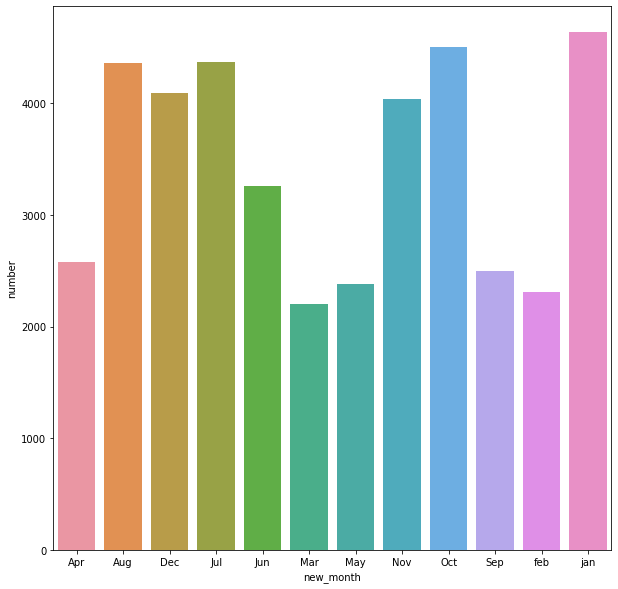

In [41]:
plt.figure(figsize=(10,10))
sns.barplot(x='new_month',y='number',data=year_2015)

Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [42]:
state = data.groupby('state')['number'].mean().sort_values(ascending = False).reset_index()

In [43]:
state

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


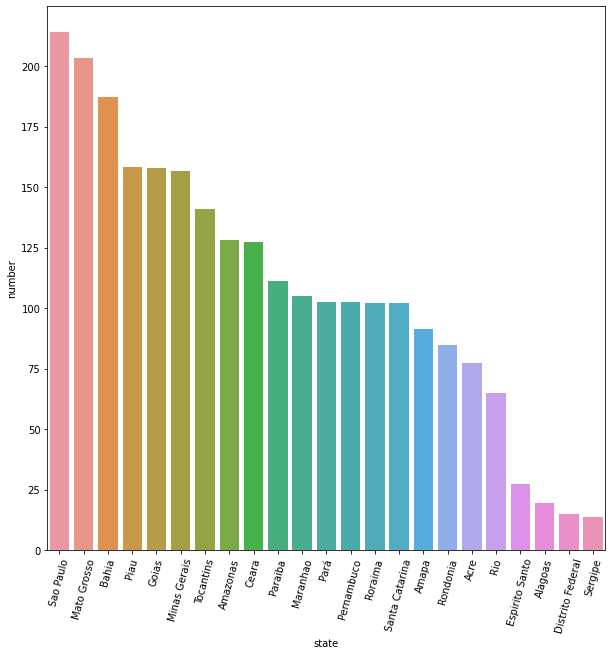

In [44]:
plt.figure(figsize=(10,10))
sns.barplot(x="state",y="number",data=state)
plt.xticks(rotation=75)
plt.show()

Find The State Names Where Fires Were Reported In 'dec' Month

In [45]:
data[data['new_month']=='Dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)